# Predavanje 5

## Sympy

In [104]:
import sympy as sp
sp.init_printing()

### Računanje s brojevima

In [105]:
x = sp.sqrt(8)
x

In [3]:
sp.srepr(x)

'Mul(Integer(2), Pow(Integer(2), Rational(1, 2)))'

In [106]:
print(x)

2*sqrt(2)


In [107]:
x.func, x.args

(sympy.core.mul.Mul, (2, sqrt(2)))

In [122]:
x.args[1].args[0].func

sympy.core.numbers.Integer

In [123]:
sp.srepr(sp.sqrt(2) - sp.sqrt(3))

'Add(Mul(Integer(-1), Pow(Integer(3), Rational(1, 2))), Pow(Integer(2), Rational(1, 2)))'

In [124]:
- sp.sqrt(3) + sp.sqrt(2) == sp.sqrt(2) - sp.sqrt(3)

True

In [6]:
x.n(50)

In [7]:
x**2

### Simboli

In [125]:
x = sp.Symbol('x')

In [126]:
x, y = sp.symbols('x, y')

In [127]:
izraz = x + 2*y

In [128]:
sp.srepr(izraz)

"Add(Symbol('x'), Mul(Integer(2), Symbol('y')))"

In [130]:
izraz.args[1].args

In [131]:
izraz.subs({x: sp.E, y: y-3})

In [132]:
sp.srepr(izraz.subs({x: sp.E, y: y-3}))

"Add(Mul(Integer(2), Symbol('y')), Integer(-6), E)"

In [133]:
izraz.n(50, subs={x:5, y:sp.pi})

### Analiza

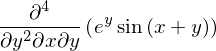

In [136]:
sp.Derivative(sp.sin(x+y) * sp.E**y, y, 2, x, y)

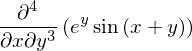

In [137]:
der = sp.Derivative(sp.sin(x+y) * sp.E**y, x, y, 3)
der

In [138]:
der = der.doit()
der

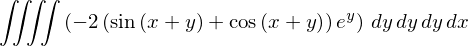

In [139]:
intg = sp.Integral(der, y, y, y, x)
intg

In [140]:
%time intg.doit()

CPU times: user 1.1 s, sys: 0 ns, total: 1.1 s
Wall time: 1.1 s


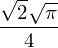

In [17]:
sp.Integral(sp.sin(x**2), (x, 0, sp.oo)).doit()

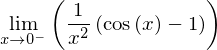

In [18]:
lim = sp.Limit((sp.cos(x) - 1) / x**2, x, 0, '-')
lim

In [19]:
lim.doit()

In [20]:
sp.Limit(3**x / 2**x, x, sp.oo).doit()

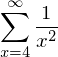

In [21]:
red = sp.Sum(x**-2, (x, 4, sp.oo))
red

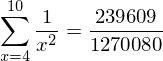

In [146]:
konačna_suma = sp.Sum(x**-2, (x, 4, 10))
sp.Eq(konačna_suma, konačna_suma.doit())

In [155]:
čvor = sp.Add(1, 1, evaluate=False)
sp.Eq(čvor, čvor.doit(), evaluate=False)

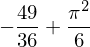

In [147]:
red.doit()

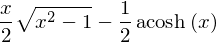

In [23]:
sp.Integral(sp.sqrt(x**2 - 1)).doit()

### Rješavanje jednadžbi

In [24]:
jednadžba = sp.Eq(x**3 + 8)
jednadžba

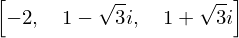

In [25]:
sp.solve(jednadžba)

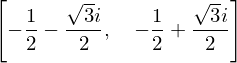

In [162]:
sp.solve(sp.Eq(x**2 + x + 1, 0), x)

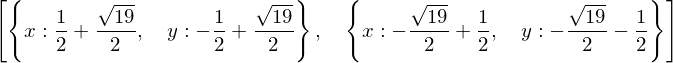

In [165]:
sp.solve([sp.Eq(x**2 + y**2, 10), sp.Eq(x - y, 1)], [x, y], dict=True)

In [166]:
y, t = sp.Function('y'), sp.Symbol('t')

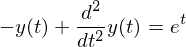

In [167]:
difj = sp.Eq(sp.Derivative(y(t), t, 2) - y(t), sp.E ** t)
difj

In [29]:
sp.classify_ode(difj, y(t))

('nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

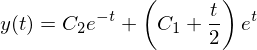

In [168]:
sp.dsolve(difj, y(t))

### Linearna algebra

In [170]:
sp.Determinant(sp.Matrix([[1,2,3], [4,5,6], [1,3,4]])**-1).doit()

In [171]:
M = sp.Matrix([[1, 2, 3], [2, 2, 2], [1, 2, 3]])

In [33]:
M.eigenvals()

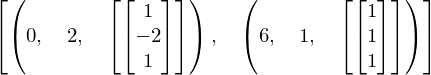

In [172]:
M.eigenvects()

### Razne manipulacije s izrazima

In [174]:
print(sp.latex(intg))

\iiiint \left(- 2 \left(\sin{\left (x + y \right )} + \cos{\left (x + y \right )}\right) e^{y}\right)\, dy\, dy\, dy\, dx


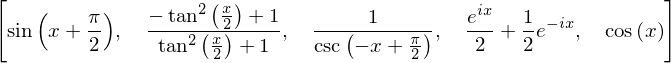

In [35]:
[sp.cos(x).rewrite(funkcija) for funkcija in (sp.sin, sp.tan, sp.csc, sp.exp, sp.acos)]

In [36]:
with sp.assuming(sp.Q.real(x), sp.Q.nonzero(x)):
    print(sp.ask(sp.Q.positive(x ** 2)))

True


In [177]:
with sp.assuming(sp.Q.integer(x)):
    print(sp.ask(sp.Q.prime(4 * x)))

False


In [37]:
(x**2 + 2*x + 1).equals((x+1)**2)

True

In [178]:
x + 1 / 3

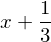

In [38]:
x + sp.S(1) / 3

In [39]:
izraz = 0
for ponavljanje in range(5):
    izraz = x ** izraz
izraz

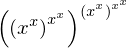

In [40]:
izraz = x
for ponavljanje in range(3):
    izraz = izraz.subs(x, x**x)
izraz

In [179]:
izraz = sp.sin(2*x) + sp.cos(2*x)

In [180]:
izraz.expand(trig=True)

In [181]:
def parcijalna_zamjena(izraz, podizraz, transformacija):
    return izraz.subs(podizraz, transformacija(podizraz))

In [182]:
parcijalna_zamjena(izraz, sp.sin(2*x), sp.expand_trig)

In [183]:
x, y = sp.symbols('x, y')
polinom = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
zamjene = {x**i : y**i for i in range(5) if not i % 2}
zamjene

In [184]:
polinom.subs(zamjene)

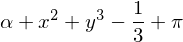

In [185]:
sp.S('x^2+y^3-1/3+pi+alpha')

In [48]:
from sympy.printing.dot import dotprint

In [188]:
from sympy.abc import a, b, c, x
print(dotprint(sp.solve(a * x**2 + b * x + c, x)[~0]))

digraph{

# Graph style
"ordering"="out"
"rankdir"="TD"

#########
# Nodes #
#########

"Mul(Rational(-1, 2), Pow(Symbol(a), NegativeOne()), Add(Symbol(b), Pow(Add(Pow(Symbol(b), Integer(2)), Mul(Integer(-4), Symbol(a), Symbol(c))), Half())))_()" ["color"="black", "label"="Mul", "shape"="ellipse"];
"Rational(-1, 2)_(0,)" ["color"="black", "label"="-1/2", "shape"="ellipse"];
"Pow(Symbol(a), NegativeOne())_(1,)" ["color"="black", "label"="Pow", "shape"="ellipse"];
"Symbol(a)_(1, 0)" ["color"="black", "label"="a", "shape"="ellipse"];
"NegativeOne()_(1, 1)" ["color"="black", "label"="-1", "shape"="ellipse"];
"Add(Symbol(b), Pow(Add(Pow(Symbol(b), Integer(2)), Mul(Integer(-4), Symbol(a), Symbol(c))), Half()))_(2,)" ["color"="black", "label"="Add", "shape"="ellipse"];
"Symbol(b)_(2, 0)" ["color"="black", "label"="b", "shape"="ellipse"];
"Pow(Add(Pow(Symbol(b), Integer(2)), Mul(Integer(-4), Symbol(a), Symbol(c))), Half())_(2, 1)" ["color"="black", "label"="Pow", "shape"="ellipse"];
"Add(Pow(S

In [50]:
from IPython.display import SVG

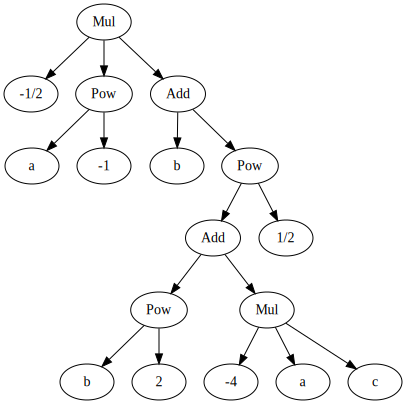

In [189]:
SVG('izraz.svg')

In [190]:
(sp.gamma(x + 2) / sp.gamma(x)).simplify()

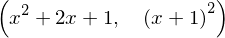

In [53]:
(x ** 2 + 2 * x + 1).simplify(), (x ** 2 + 2 * x + 1).factor()

In [54]:
((x + 1) * (x - 2) - (x + 3) * (x - 1)).expand()

In [191]:
from sympy.abc import z
(x**2*z + 4*x*y*z + 4*y**2*z).factor()

In [56]:
(sp.cos(x)**2 + sp.sin(x)**2 - 2*sp.sin(x)*sp.cos(x)).factor()

In [192]:
izraz = x*y + x - 3 + 2*x**2 - z*x**2 + x**3

In [193]:
izraz.coeff(x, 2)

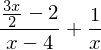

In [194]:
izraz = 1 / x + (3*x/2 - 2) / (x - 4)
izraz

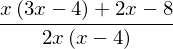

In [195]:
izraz.together()

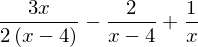

In [196]:
izraz.expand()

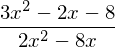

In [197]:
izraz.cancel()

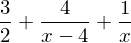

In [198]:
izraz.apart()

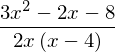

In [199]:
izraz.together().expand().together()

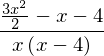

In [200]:
izraz.simplify()

In [64]:
izraz = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)

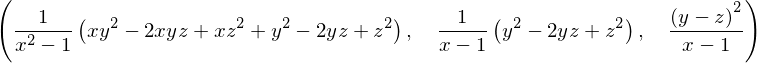

In [65]:
izraz, izraz.cancel(), izraz.factor()

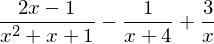

In [66]:
((4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)).apart()

In [67]:
(sp.acos(sp.cos(7)) - (7 - 2*sp.pi)).n()

In [201]:
sp.trigsimp(sp.acos(sp.cos(7)))

In [68]:
sp.acos(sp.cos(7)).simplify()  # Krivo!

In [69]:
sp.trigsimp(sp.sinh(x)**4 - sp.cosh(x)**4)

In [70]:
sp.expand_trig(sp.cos(1 - x))

In [71]:
sp.trigsimp(_)

In [72]:
from sympy.abc import a, b, c, x, y, z

In [73]:
sp.powsimp(x**a * x**b)

In [74]:
sp.powsimp(2**a * 3**a)

In [75]:
ar, br, cr, xr, yr, zr = sp.symbols('a b c x y z', real=True)

In [76]:
ap, bp, cp, xp, yp, zp = sp.symbols('a b c x y z', nonnegative=True)

In [77]:
sp.powsimp(xp ** ar * yp ** ar)

In [78]:
sp.powsimp(x ** a * y ** a, force=True)

In [79]:
sp.powsimp(x ** 2 * y ** 2)

In [203]:
2*(x+y), (x*y)**2

In [80]:
sp.expand_power_exp(x ** (a + b))

In [81]:
sp.expand_power_base((xp * yp) ** ar)

In [82]:
sp.powdenest((xp**ar)**br)

In [83]:
bi = sp.Symbol('b', integer=True)

In [84]:
sp.powdenest((x**a)**bi)

In [85]:
from sympy.abc import x, y
xp, yp = sp.symbols('x y', positive=True)
sp.expand_log(sp.log(xp * yp))

In [86]:
sp.exp(sp.log(x))

In [87]:
sp.log(sp.exp(x))

In [88]:
sp.expand_log(sp.log(xp ** ar))

In [89]:
sp.logcombine(2 * sp.log(xp))

In [204]:
sp.Eq(sp.factorial(x), sp.gamma(x + 1))

In [205]:
_.simplify()

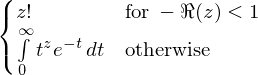

In [206]:
sp.Integral(t**z * sp.E**-t, (t, 0, sp.oo)).doit().rewrite(sp.factorial)

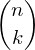

In [93]:
from sympy.abc import n, k
sp.binomial(n, k)

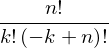

In [207]:
sp.binomial(n, k).rewrite(sp.factorial)

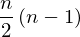

In [96]:
sp.combsimp(sp.binomial(n, n-2))

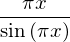

In [97]:
sp.combsimp(sp.factorial(x) * sp.factorial(-x))

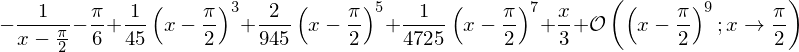

In [98]:
sp.series(sp.tan(x), x, sp.pi / 2, 9)

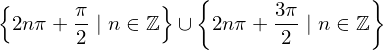

In [99]:
sp.solveset(sp.cos(x), x)

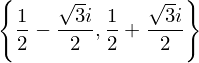

In [100]:
sp.solveset(x**2 - x + 1, x)

In [101]:
sp.solveset(sp.Eq(x - y, x + y + 2), x)

In [210]:
sp.solveset(sp.sin(x) <= 0, x, sp.S.Reals)  # Krivo!

In [211]:
sp.srepr(_)

'Union(FiniteSet(Integer(0)), Interval(pi, Mul(Integer(2), pi), S.false, S.false))'

In [213]:
M = sp.Matrix([[2, 3], [4, 5], [7, 1]])

In [217]:
M.col(0)

In [218]:
sp.Matrix([1, 9])

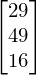

In [219]:
M * _

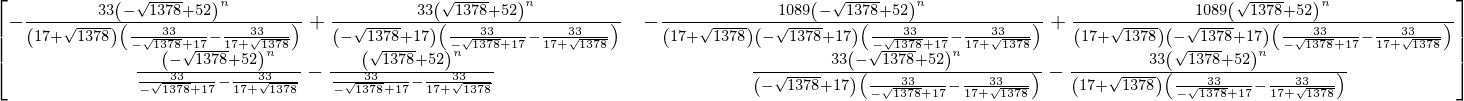

In [224]:
(M.T * M) ** n

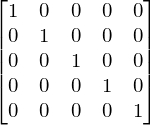

In [225]:
sp.eye(5)

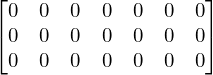

In [226]:
sp.zeros(3, 7)

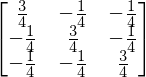

In [231]:
(sp.ones(3, 3) + sp.eye(3)) ** -1

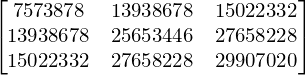

In [247]:
n = sp.Symbol('n', positive=True)
sp.simplify(((M * M.T) ** n).subs({n: 4}).expand())

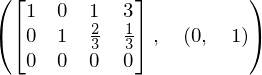

In [237]:
sp.Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]]).rref()